<a href="https://colab.research.google.com/github/Shreyabansal3112/image-basics/blob/main/cv6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

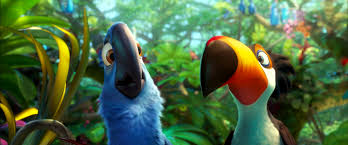

(145, 348, 3)

In [ ]:
img=cv.imread('images.jpg')
from google.colab.patches import cv2_imshow
cv2_imshow(img)
img.shape

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


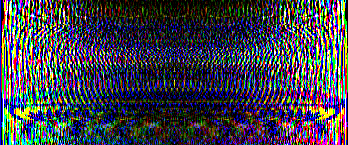

In [ ]:
f= np.fft.fft2(img)
cv2_imshow(f)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


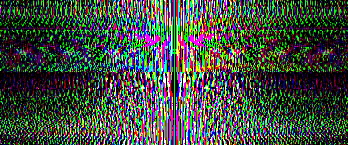

In [ ]:
fs=np.fft.fftshift(f)
cv2_imshow(fs)

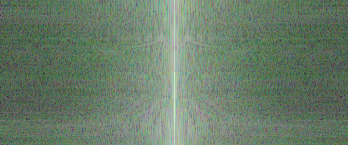

In [ ]:
mag_spec=20*np.log(np.abs(fs))
cv2_imshow(mag_spec)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


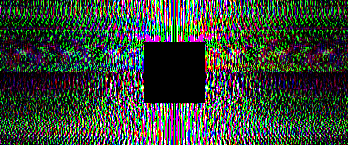

In [ ]:
r,c,b=img.shape
cr,cc=r//2,c//2
fs[cr-30:cr+31,cc-30:cc+31]=0
cv2_imshow(fs)

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


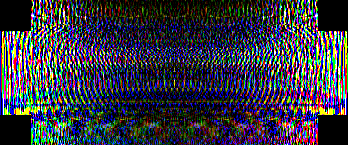

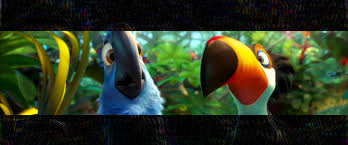

In [ ]:
f_is=np.fft.ifftshift(fs)
cv2_imshow(f_is)
imgback=np.fft.ifft2(f_is)
imgback=np.abs(imgback)
cv2_imshow(imgback)

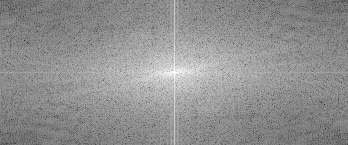

In [ ]:
img2 = cv.imread('images.jpg',cv.IMREAD_GRAYSCALE)
f= np.fft.fft2(img2)
fs=np.fft.fftshift(f)
mag_spec=20*np.log(np.abs(fs))
cv2_imshow(mag_spec)

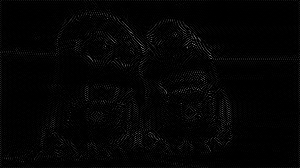

In [ ]:
r,c=img2.shape
cr,cc=r//2,c//2
fs[cr-30:cr+31,cc-30:cc+31]=0
fis=np.fft.ifftshift(fs)
imgback=np.fft.ifft2(fs)
imgback=np.real(imgback)
cv2_imshow(imgback)

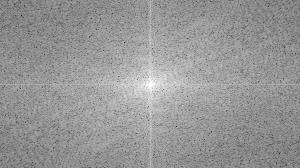

(168, 300)

In [ ]:
dft= cv.dft(np.float32(img2),flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift=np.fft.fftshift(dft)
mag_spec=20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
cv2_imshow(mag_spec)
mag_spec.shape

In [ ]:
r,c=img2.shape
cr,cc=r//2,c//2
m=np.zeros((r,c,2),np.uint8)
m[cr-30:cr+31,cc-30:cc+31]=1
m.shape

(168, 300, 2)

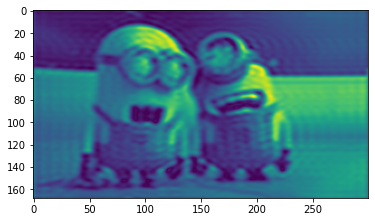

In [ ]:
fs=dft_shift*m
fis=np.fft.ifftshift(fs)
imgback=cv.idft(fis)
imgback=cv.magnitude(imgback[:,:,0],imgback[:,:,1])
plt.imshow(imgback)